In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = '/Users/dinadraguzya/PycharmProjects/netology/py_11/names/'

In [61]:
names_by_year = dict()
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv(f'{file_path}/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos']) 

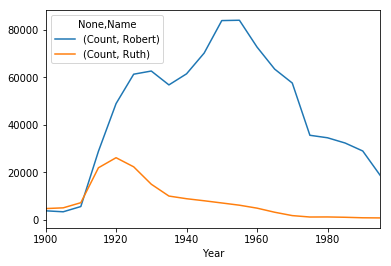

In [62]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

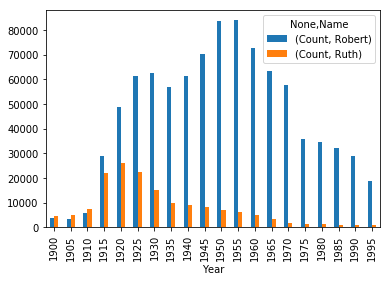

In [63]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [64]:
names_1950 = dict()
names_1950[1950] = pd.read_csv(f'{file_path}/yob1950.txt', names=['Name','Gender','Count'])
names_all_pie = pd.concat(names_1950, names=['Year', 'Pos']) 
names_for_pie = names_all[names_all.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count',
                                                                                            ascending=False).head(10)

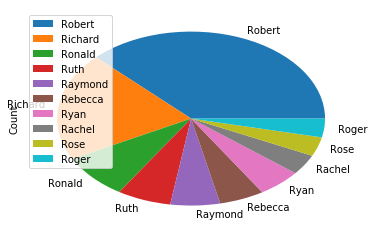

In [65]:
names_for_pie.plot.pie(y='Count')

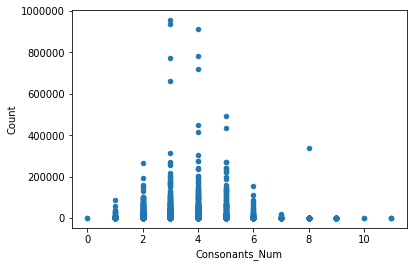

In [72]:
names_for_scatter = pd.concat(names_by_year).groupby('Name', as_index=False).sum()
consonants = ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'X', 'Z', 'W', 'Y']
names_for_scatter['Consonants_Num'] = names_for_scatter.apply(lambda row: sum(row.Name.upper().count(c) for c in consonants),
                                                              axis=1)
names_for_scatter.plot.scatter(x='Consonants_Num', y='Count')